In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
homicide_file = "Resources/homicide_total_rate_and_count.csv"
kidnapping_file = "Resources/kidnapping_0.csv"
robbery_file = "Resources/robbery_0.csv"
seizure_file = "Resources/seizure-table.csv"
assault_file = "Resources/serious_assault_0.csv"
burglary_file = "Resources/bulglary.csv"
sexual_violence_file = "Resources/sexual_violence_0.csv"
theft_file = "Resources/btheft_0.csv"

* Reading in the homicide file and clean it
* Show Brazil data and years 2015 - 2017

In [104]:
homicide_df = pd.read_csv(homicide_file)

In [105]:
homicide_df.head()

,Level,Indicator,Value,Region,Subregion,Territory,Year,Source,Source Description
0,Country,Homicide count,1115.0,Asia,Southern Asia,Afghanistan,2009,NSO,National Statistical Office
1,Country,Homicide count,983.0,Asia,Southern Asia,Afghanistan,2010,NSO,National Statistical Office
2,Country,Homicide count,1231.0,Asia,Southern Asia,Afghanistan,2011,NSO,National Statistical Office
3,Country,Homicide count,1948.0,Asia,Southern Asia,Afghanistan,2012,NSO,National Statistical Office
4,Country,Homicide count,3367.0,Asia,Southern Asia,Afghanistan,2015,NSO,National Statistical Office


In [106]:
brazil_homicide_df = homicide_df.loc[(homicide_df["Territory"] == "Brazil"), :]

In [107]:
years_brazil_homicide_df = brazil_homicide_df.loc[(brazil_homicide_df["Year"] == 2015) | 
                                                  (brazil_homicide_df["Year"] == 2016) |
                                                  (brazil_homicide_df["Year"] == 2017), :]

In [108]:
years_brazil_homicide_df[["Year", "Indicator", "Value"]]

,Year,Indicator,Value
1083,2015,Homicide count,58459.000000
1084,2016,Homicide count,61597.000000
1085,2017,Homicide count,64078.000000
1112,2015,Homicide rate,28.590256
1113,2016,Homicide rate,29.877807
1114,2017,Homicide rate,30.831363


In [109]:
homicide_list = years_brazil_homicide_df["Value"].tolist()

In [110]:
brazil_homicide_final = pd.DataFrame({
    "Year": ["2015", "2016", "2017"],
    "Homicide Count": [homicide_list[0], homicide_list[1], homicide_list[2]],
    "Homicide Rate": [homicide_list[3], homicide_list[4], homicide_list[5]]
    })
brazil_homicide_final.set_index("Year")

,Homicide Count,Homicide Rate
Year,,
2015,58459.0,28.590256
2016,61597.0,29.877807
2017,64078.0,30.831363


* Reading in the kidnapping file and clean it
* Show Brazil data and years 2015 - 2017

In [111]:
kidnapping_df = pd.read_csv(kidnapping_file)

In [112]:
kidnapping_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2003,2003.1,2004,2004.1,2005,2005.1,2006,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,Region,Sub-region,Country,Count,Rate,Count,Rate,Count,Rate,Count,...,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate
1,Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58,0.608,79,0.803,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,Eastern Africa,Kenya,NaN,NaN,235,0.659,152,0.415,220,...,59,0.13,33,0.071,110,0.23,NaN,NaN,NaN,NaN
3,Africa,Eastern Africa,Madagascar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,0.026,14,0.059,11,0.045,NaN,NaN,NaN,NaN
4,Africa,Eastern Africa,Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
brazil_kidnapping_df = kidnapping_df.loc[(kidnapping_df["Unnamed: 2"] == "Brazil"), :]

In [114]:
brazil_kidnapping_df = brazil_kidnapping_df[["Unnamed: 0", "Unnamed: 1", "Unnamed: 2",
                                              "2015", "2015.1",
                                              "2016", "2016.1",
                                              "2017", "2017.1",]]

In [115]:
renamed_brazil_df = brazil_kidnapping_df.rename(columns = {"Unnamed: 0": "Region",
                                       "Unnamed: 1": "Sub-Region",
                                       "Unnamed: 2": "Country",
                                       "2015": "2015 Count",
                                       "2015.1": "2015 Rate",
                                       "2016": "2016 Count",
                                       "2016.1": "2016 Rate",
                                       "2017": "2017 Count",
                                       "2017.1": "2017 Rate"})

In [116]:
brazil_kidnapping_final = pd.DataFrame({
    "Year": ["2015", "2016", "2017"],
    "Kidnapping Count": [renamed_brazil_df.iloc[0]["2015 Count"],renamed_brazil_df.iloc[0]["2016 Count"], renamed_brazil_df.iloc[0]["2017 Count"] ],
    "Kidnapping Rate": [renamed_brazil_df.iloc[0]["2015 Rate"], renamed_brazil_df.iloc[0]["2016 Rate"], renamed_brazil_df.iloc[0]["2017 Rate"]]
})

brazil_kidnapping_final.set_index("Year")

,Kidnapping Count,Kidnapping Rate
Year,,
2015,473,0.231
2016,753,0.365
2017,524,0.252


In [117]:
brazil_kidnapping_final[["Kidnapping Count", "Kidnapping Rate"]] = brazil_kidnapping_final[["Kidnapping Count", "Kidnapping Rate"]].apply(pd.to_numeric)

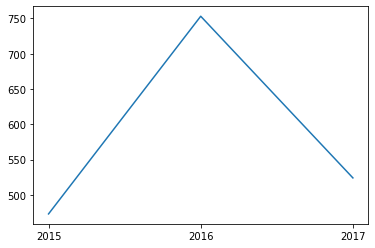

In [118]:
x_axis = ["2015", "2016", "2017"]

plt.plot(x_axis, brazil_kidnapping_final["Kidnapping Count"])

<BarContainer object of 3 artists>

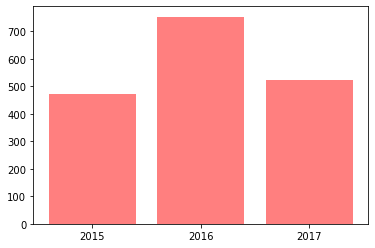

In [119]:
plt.bar(x_axis, brazil_kidnapping_final["Kidnapping Count"], color='r', alpha=0.5, align="center")

* Reading in the robbery file and clean it
* Show Brazil data and years 2015 - 2017

In [120]:
robbery_df = pd.read_csv(robbery_file)

In [121]:
robbery_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,Region,Sub-region,Country,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate
1,Africa,Eastern Africa,Burundi,"3,039",35.028,"4,266",47.622,"4,246",45.923,"4,108",43.061,"4,495",45.662,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,Eastern Africa,Kenya,"2,843",6.764,"3,262",7.555,"3,262",7.356,"3,551",7.801,"3,011",6.448,"2,865",5.984,"2,654",5.411,"2,713",5.402
3,Africa,Eastern Africa,Madagascar,"3,131",14.802,"2,272",10.449,"2,192",9.809,"2,819",12.277,"2,165",9.178,"1,741",7.184,NaN,NaN,NaN,NaN
4,Africa,Eastern Africa,Mauritius,"1,085",86.939,814,65.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
brazil_robbery_df = robbery_df.loc[(robbery_df["Unnamed: 2"] == "Brazil"), :]

In [123]:
brazil_robbery_df = brazil_robbery_df[["Unnamed: 0", 
                                       "Unnamed: 1", 
                                       "Unnamed: 2",
                                       "2015", 
                                       "2015.1",
                                       "2016", 
                                       "2016.1",
                                       "2017", 
                                       "2017.1"]]

In [124]:
renamed_robbery_df = brazil_robbery_df.rename(columns = {"Unnamed: 0": "Region",
                                       "Unnamed: 1": "Sub-Region",
                                       "Unnamed: 2": "Country",
                                       "2015": "2015 Count",
                                       "2015.1": "2015 Rate",
                                       "2016": "2016 Count",
                                       "2016.1": "2016 Rate",
                                       "2017": "2017 Count",
                                       "2017.1": "2017 Rate"})

In [125]:
brazil_robbery_final = pd.DataFrame({
    "Year": ["2015", "2016", "2017"],
    "Robbery Count": [renamed_robbery_df.iloc[0]["2015 Count"],renamed_robbery_df.iloc[0]["2016 Count"], renamed_robbery_df.iloc[0]["2017 Count"] ],
    "Robbery Rate": [renamed_robbery_df.iloc[0]["2015 Rate"], renamed_robbery_df.iloc[0]["2016 Rate"], renamed_robbery_df.iloc[0]["2017 Rate"]]
})

brazil_robbery_final.set_index("Year")

,Robbery Count,Robbery Rate
Year,,
2015,"1,550,614",758.35
2016,"1,590,325",771.392
2017,"1,657,131",797.334


In [126]:
count_list = brazil_robbery_final["Robbery Count"].tolist()

brazil_robbery_final["Robbery Count"].replace({"1,550,614": count_list[0].replace(',', ''), "1,590,325": count_list[1].replace(',', ''), "1,657,131": count_list[2].replace(',', '')}, inplace=True)


In [127]:
brazil_robbery_final[["Robbery Count", "Robbery Rate"]] = brazil_robbery_final[["Robbery Count", "Robbery Rate"]].apply(pd.to_numeric)

<BarContainer object of 3 artists>

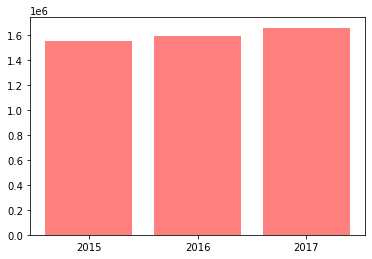

In [140]:
plt.bar(x_axis, brazil_robbery_final["Robbery Count"], color='r', alpha=0.5, align="center")

* Reading in the seizure file and clean it
* Show Brazil data and years 2015 - 2017

In [128]:
seizure_df = pd.read_csv(seizure_file)

In [129]:
seizure_df.head()

,Region,SubRegion,Country,Country Code,DrugGroup,Drug,Year,KgEquivalent
0,Africa,East Africa,Kenya,KEN,ATS,Methamphetamine,2019,0.283
1,Africa,East Africa,Kenya,KEN,ATS,Methamphetamine,2019,1.000
2,Africa,East Africa,Kenya,KEN,Cannabis-type,Cannabis plants,2019,13.000
3,Africa,East Africa,Kenya,KEN,Cannabis-type,Marijuana (herb),2019,0.744
4,Africa,East Africa,Kenya,KEN,Cannabis-type,Marijuana (herb),2019,3773.000


In [130]:
brazil_seizure_df = seizure_df.loc[(seizure_df["Country"] == "Brazil"), :]

In [131]:
year_brazil_seizure_df = brazil_seizure_df.loc[(brazil_seizure_df["Year"] == 2015) | 
                                               (brazil_seizure_df["Year"] == 2016) | 
                                               (brazil_seizure_df["Year"] == 2017), :]

In [132]:
year_brazil_seizure_df

,Region,SubRegion,Country,Country Code,DrugGroup,Drug,Year,KgEquivalent
2496,Americas,South America,Brazil,BRA,ATS,Amphetamine,2017,43.563500
2497,Americas,South America,Brazil,BRA,ATS,Ecstasy-type substances,2017,204.567602
2498,Americas,South America,Brazil,BRA,ATS,Methamphetamine,2017,72.854500
2499,Americas,South America,Brazil,BRA,Cannabis-type,Cannabis plants,2017,191045.100000
2500,Americas,South America,Brazil,BRA,Cannabis-type,Cannabis seed,2017,32.700000
2501,Americas,South America,Brazil,BRA,Cannabis-type,Hashish (resin),2017,546.700000
2502,Americas,South America,Brazil,BRA,Cannabis-type,Marijuana (herb),2017,350314.300000
2503,Americas,South America,Brazil,BRA,Cocaine-type,Cocaine salts,2017,48047.200000
2504,Americas,South America,Brazil,BRA,Hallucinogens,LSD,2017,0.000310
2505,Americas,South America,Brazil,BRA,Opioids,Heroin,2017,0.600000


In [133]:
grouped_drug_df = year_brazil_seizure_df.groupby("Year").agg('sum')
grouped_drug_df

,KgEquivalent
Year,
2015,421214.787413
2016,337737.792714
2017,590307.585912


* Reading in the assault file and clean it
* Show Brazil data and years 2015 - 2017

In [134]:
assault_df = pd.read_csv(assault_file)

In [135]:
assault_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2003,2003.1,2004,2004.1,2005,2005.1,2006,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,Region,Sub-region,Country,Count,Rate,Count,Rate,Count,Rate,Count,...,Count,Rate,Count,Rate,Count,Rate,Count,Rate,Count,Rate
1,Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431,4.52,549,5.58,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,Eastern Africa,Kenya,NaN,NaN,NaN,NaN,"12,715",34.72,"13,186",...,"13,674",30.04,"13,949",29.87,"14,921",31.16,"15,705",32.02,"15,968",31.8
3,Africa,Eastern Africa,Madagascar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,744",11.95,"2,542",10.78,"2,189",9.03,NaN,NaN,NaN,NaN
4,Africa,Eastern Africa,Mauritius,105,8.68,144,11.84,122,9.98,106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
brazil_assault_df = assault_df.loc[(assault_df["Unnamed: 2"] == "Brazil"), :]

In [137]:
renamed_brazil_assault_df = brazil_assault_df[["Unnamed: 0", "Unnamed: 1", "Unnamed: 2",
                                              "2015", "2015.1",
                                              "2016", "2016.1",
                                              "2017", "2017.1",]]

In [138]:
renamed_brazil_df_2 = renamed_brazil_assault_df.rename(columns = {"Unnamed: 0": "Region",
                                       "Unnamed: 1": "Sub-Region",
                                       "Unnamed: 2": "Country",
                                       "2015": "2015 Count",
                                       "2015.1": "2015 Rate",
                                       "2016": "2016 Count",
                                       "2016.1": "2016 Rate",
                                       "2017": "2017 Count",
                                       "2017.1": "2017 Rate"})

In [139]:
brazil_assault_final = pd.DataFrame({
    "Year": ["2015", "2016", "2017"],
    "Assault Count": [renamed_brazil_df_2.iloc[0]["2015 Count"],renamed_brazil_df_2.iloc[0]["2016 Count"], renamed_brazil_df_2.iloc[0]["2017 Count"] ],
    "Assault Rate": [renamed_brazil_df_2.iloc[0]["2015 Rate"], renamed_brazil_df_2.iloc[0]["2016 Rate"], renamed_brazil_df_2.iloc[0]["2017 Rate"]]
})

brazil_assault_final.set_index("Year")

,Assault Count,Assault Rate
Year,,
2015,"621,009",303.71
2016,"600,920",291.48
2017,"591,881",284.79
